c:\Users\herma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster wurden in separate CSV-Dateien gespeichert.


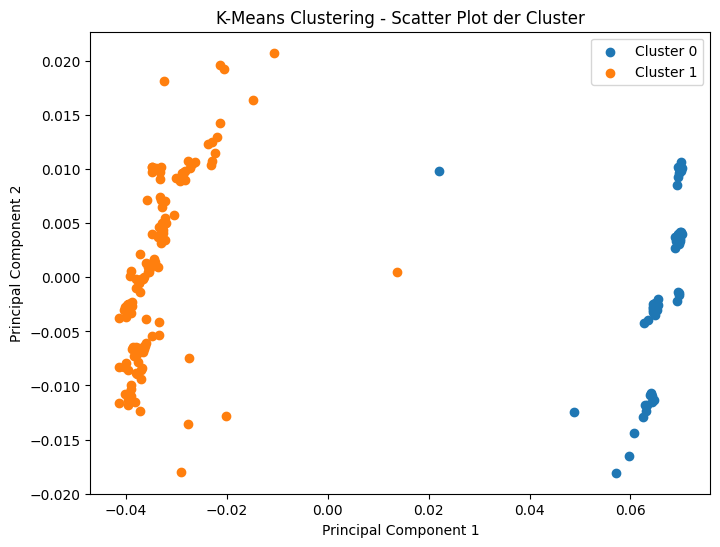

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# CSV-Datei einlesen
file_path = 'D:\Sensorprobe\drill.csv'
df = pd.read_csv(file_path)

# Anzahl der Cluster, die du erstellen möchtest
num_clusters = 2

# K-Means Clustering durchführen
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(df)

# Cluster-Labels dem DataFrame hinzufügen
df['class'] = cluster_labels

# DataFrame in separate Cluster aufteilen
cluster_data = {}
for cluster_id in range(num_clusters):
    cluster_data[cluster_id] = df[df['class'] == cluster_id]
    

# Separate CSV-Dateien für jeden Cluster speichern
for cluster_id, cluster_df in cluster_data.items():
    output_file_path = f'cluster_{cluster_id}.csv'
    cluster_df.to_csv(output_file_path, index=False)

print("Cluster wurden in separate CSV-Dateien gespeichert.")

# Dimensionalitätsreduktion auf 2 Dimensionen (PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df.iloc[:, :-1])

# Scatter Plot erstellen
plt.figure(figsize=(8, 6))
for cluster_id, cluster_df in cluster_data.items():
    cluster_points = reduced_features[cluster_df.index]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')
  

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering - Scatter Plot der Cluster')
plt.legend()
plt.show()


